# 基于主成分析与支持向量机的数字识别模型

题目要求: 输入图片,识别数字

简单的分类问题

[TOC]

## 载入数据

* 载入常用库

In [1]:
import os
import pandas as pd
import os, random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn import linear_model, svm, preprocessing, decomposition, model_selection
import seaborn as sns
%matplotlib inline 


先来看下我们的训练数据

In [2]:
DATAPATH="D:/dataset/Digit/"
print(os.listdir(DATAPATH))

train_file=DATAPATH+"train.csv"
train = pd.read_csv(train_file)
print(train.shape)
train

['sample_submission.csv', 'test.csv', 'train.csv']
(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


可以看到我们的数据是一个42000 \* 785 大小的矩阵, 每一行代表一组训练数据,第一列是所对应的数字,接下来784(28*28)列是对应各个像素点的灰度值(0-255).


随便看一下几张图片

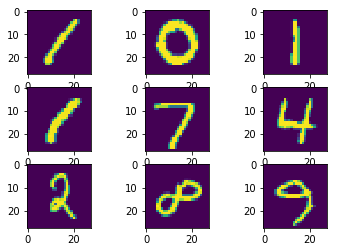

In [3]:
j=0
for i in [0,1,2,124,1234,42,233,8888,9999]:
    j+=1
    plt.subplot(3, 3, j)
    plt.imshow( np.array(train.iloc()[i].values[1:]).reshape((28,28))/255.0)
plt.show()

## 数据预处理
* 提取标签

In [4]:
Y = train.loc[:,'label':'label'].values.flatten()
Y[0:20]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5],
      dtype=int64)

* 归一正则化

In [5]:
X = preprocessing.normalize(train.loc[:,'pixel0':].values)

* 按8:2的比例分割数据集

In [6]:
(X, X_test, y, y_test) = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)

# 搭建模型

默认使用`rbf` 卷积核$\exp(-\gamma \|x-x'\|^2)$,$\gamma $ 取1.66

In [27]:
est = svm.SVC(C=1.61, gamma=1.66,cache_size=4096)

## 训练模型

In [28]:
TRAINCOUNT=10000 # 训练用数据,现在测试的话小一点,真正训练就等于训练集大小

#TRAINCOUNT=train.shape[0]
est.fit(X[:TRAINCOUNT], y[:TRAINCOUNT])

SVC(C=1.61, cache_size=4096, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.66, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 验证模型

In [17]:
est.score(X_test, y_test)

0.9698809523809524

## 测试集

In [25]:
test_file=DATAPATH+"test.csv"
test = pd.read_csv(test_file)
T=preprocessing.normalize(test.loc[:,'pixel0':].values)

## 预测测试集

In [22]:
ans = est.predict(T)

In [23]:
ans

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

## 处理与写入文件

In [24]:
ids = np.reshape(np.arange(1, ans.shape[0] + 1), (-1, 1))
answer_column = np.reshape(ans, (-1, 1))
answer_matrix = np.append(ids, answer_column, axis=1)
df = pd.DataFrame(answer_matrix, columns=["ImageId", "Label"])
df.to_csv("simplesvm.csv", sep=",", index=False)

在排行榜上取得** 0.96714 **的成绩

# 优化

在优化之前先找出上面代码的问题,

首先,我们只用到了前1w个数据来进行训练,这是为了加快训练速度,你可以用全部的训练数据进行训练(包括训练集与验证集),模型的最终效果可能会好一点.不过注意一点,官方的说法是svm算法的时间复杂度介于$O_{特征}* O^2_{样本数}$和$O_{特征}* O^3_{样本数}$之间:)


其次,在定义svm模型时使用了两个魔数1.61和1.68,或许改变这两个数字会改善模型的性能?

### 主成分分析

要加快训练速度,从特征数下手,我们使用PCA的前50个数据当作新的特征数据(即从784降到50).
* 进行主成分分析

In [31]:
pca = decomposition.PCA(n_components=50, whiten=True)
X=preprocessing.normalize(train.loc[:,'pixel0':].values)
X=pca.fit(X).transform(X)

In [32]:
pd.DataFrame(X[:3])#显示主成分析后结果

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.535293,-1.110612,-0.731363,1.333155,-1.754703,-1.092480,1.812278,0.289279,1.612573,-0.288227,...,0.127268,-0.432456,0.581384,-1.513802,-0.097285,-1.329350,0.040565,-0.804422,0.346160,0.852281
1,-1.483209,-1.734452,0.313483,0.104703,-0.864101,2.068636,-1.027981,-0.446621,0.151356,-0.484600,...,0.624810,-0.272866,0.479384,-0.755864,-0.383109,-0.267326,0.261812,-1.144965,0.766826,-0.104877
2,2.021091,0.318131,0.452610,-1.208539,1.750276,1.823014,-0.857398,-0.999567,0.806976,1.349876,...,0.723651,-0.458668,0.943911,1.245871,1.380466,0.624583,-0.064628,-0.239089,-0.069761,-0.948793


* 重新分割数据集 8:2

In [33]:
 (X, X_test, y, y_test) = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)

* 再训练与验证一次

In [36]:
est = svm.SVC(C=1.61, gamma=1.66,cache_size=4096)
est.fit(X[:TRAINCOUNT], y[:TRAINCOUNT])
est.score(X_test, y_test)

0.1144047619047619

可以看到效果不是很好,但是我们把$\gamma $ 和C 改成0.00774和4.17531的话

In [37]:
est = svm.SVC(C=4.17531, gamma=0.00774,cache_size=4096)
est.fit(X[:TRAINCOUNT], y[:TRAINCOUNT])
est.score(X_test, y_test)

0.9653571428571428

可以看到参数的选择对性能影响很大,那么怎么找到比较好的参数呢?

答案是:一个一个找

首先定义查找的范围

In [39]:
C_range = np.logspace(-6, 6, 30)
gamma_range = np.logspace(-6, 1, 10)
C_range,gamma_range

(array([1.00000000e-06, 2.59294380e-06, 6.72335754e-06, 1.74332882e-05,
        4.52035366e-05, 1.17210230e-04, 3.03919538e-04, 7.88046282e-04,
        2.04335972e-03, 5.29831691e-03, 1.37382380e-02, 3.56224789e-02,
        9.23670857e-02, 2.39502662e-01, 6.21016942e-01, 1.61026203e+00,
        4.17531894e+00, 1.08263673e+01, 2.80721620e+01, 7.27895384e+01,
        1.88739182e+02, 4.89390092e+02, 1.26896100e+03, 3.29034456e+03,
        8.53167852e+03, 2.21221629e+04, 5.73615251e+04, 1.48735211e+05,
        3.85662042e+05, 1.00000000e+06]),
 array([1.00000000e-06, 5.99484250e-06, 3.59381366e-05, 2.15443469e-04,
        1.29154967e-03, 7.74263683e-03, 4.64158883e-02, 2.78255940e-01,
        1.66810054e+00, 1.00000000e+01]))

定义待查找参数的模型

In [40]:
svc = svm.SVC(kernel="rbf",cache_size=4096)

查找器,

它将会把C_range和gamma_range进行组合,当作模型的参数,对每个模型用训练数据训练,验证数据验证,找出验证结果最好的参数组合

In [43]:
clf = model_selection.GridSearchCV(estimator=svc, cv=model_selection.ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
                                   , param_grid=dict(C=C_range, gamma=gamma_range), n_jobs=-1,verbose=1)

下面的代码一共训练了30*10 个模型,所以数据量不要太大

In [44]:
SEARCHMAX=1000
clf.fit(X[:SEARCHMAX], y[:SEARCHMAX])

Fitting 1 folds for each of 300 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   41.4s finished


GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=4096, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-06, 2.59294e-06, 6.72336e-06, 1.74333e-05, 4.52035e-05,
       1.17210e-04, 3.03920e-04, 7.88046e-04, 2.04336e-03, 5.29832e-03,
       1.37382e-02, 3.56225e-02, 9.23671e-02, 2.39503e-01, 6.21017e-01,
       1.61026e+00, 4.17532e+00, 1.08264e+01, 2.80722e+01, 7.27895e... 2.15443e-04, 1.29155e-03,
       7.74264e-03, 4.64159e-02, 2.78256e-01, 1.66810e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

我们看下结果

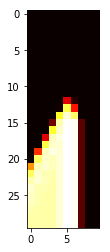

In [61]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
plt.imshow(clf.cv_results_["mean_test_score"].reshape(30,10), 
        cmap=cm.hot,norm=Normalize())

横坐标表示gamma参数,纵坐标表示C参数,左上角是最小的两个参数的组合

我们来看下最好的参数组合长怎么样

In [62]:
clf.best_params_

{'C': 4.175318936560401, 'gamma': 0.007742636826811269}

也就是上面用的数字:)

我们可以进行二次查找,不过要确定新的数据范围

先看下在gamma=0.007742636826811269时,验证的准确率随C的表现,
和C=4.175318936560401时gamma的表现

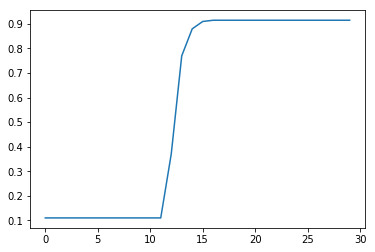

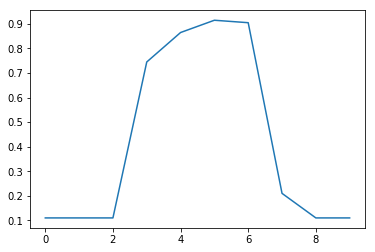

In [67]:
plt.plot(clf.cv_results_["mean_test_score"].reshape(30,10)[:,5])
plt.show()
plt.plot(clf.cv_results_["mean_test_score"].reshape(30,10)[16,:])

可以看到在C[12]之后准确率开始增长,且图像程tanh形状的,我们下次就从C[12]开始,使用线性范围.对于gamma,可以看到波峰在第4到第8中间,我们继续选用log.

新的参数列表如下

In [79]:
C_range2 = np.linspace(C_range[12], C_range[17], 20, endpoint=True)
gamma_range2 = np.logspace(np.log(gamma_range[5]), np.log(gamma_range[8]), 20)
(C_range2 ,gamma_range2)

(array([ 0.09236709,  0.65731447,  1.22226185,  1.78720923,  2.35215661,
         2.91710399,  3.48205138,  4.04699876,  4.61194614,  5.17689352,
         5.7418409 ,  6.30678828,  6.87173567,  7.43668305,  8.00163043,
         8.56657781,  9.13152519,  9.69647258, 10.26141996, 10.82636734]),
 array([1.37716833e-05, 2.64095277e-05, 5.06447279e-05, 9.71198157e-05,
        1.86243643e-04, 3.57153627e-04, 6.84902377e-04, 1.31341594e-03,
        2.51869679e-03, 4.83002632e-03, 9.26239089e-03, 1.77621982e-02,
        3.40620138e-02, 6.53196620e-02, 1.25261479e-01, 2.40210034e-01,
        4.60643293e-01, 8.83361283e-01, 1.69399439e+00, 3.24852023e+00]))

再次训练

In [80]:
svc = svm.SVC(kernel="rbf",cache_size=4096)
clf = model_selection.GridSearchCV(estimator=svc, cv=model_selection.ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
                                   , param_grid=dict(C=C_range2, gamma=gamma_range2), n_jobs=-1,verbose=1)
SEARCHMAX=1000
clf.fit(X[:SEARCHMAX], y[:SEARCHMAX])
plt.imshow(clf.cv_results_["mean_test_score"].reshape(20,20), 
        cmap=cm.hot,norm=Normalize())

Fitting 1 folds for each of 400 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   56.4s finished


GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=4096, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([ 0.09237,  0.65731,  1.22226,  1.78721,  2.35216,  2.9171 ,
        3.48205,  4.047  ,  4.61195,  5.17689,  5.74184,  6.30679,
        6.87174,  7.43668,  8.00163,  8.56658,  9.13153,  9.69647,
       10.26142, 10.82637]), 'gamma': array([1.37717e-05, 2.64095e-05, 5.06447e-05... 6.53197e-02, 1.25261e-01,
       2.40210e-01, 4.60643e-01, 8.83361e-01, 1.69399e+00, 3.24852e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

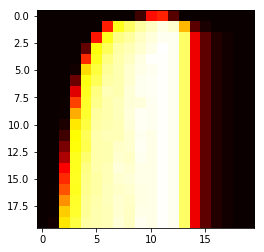

In [81]:
plt.imshow(clf.cv_results_["mean_test_score"].reshape(20,20), 
        cmap=cm.hot,norm=Normalize())

可以看到热力图基本居中,我们的参数范围还行,看下这次最好的参数列表

In [82]:
clf.best_params_

{'C': 1.7872092309327074, 'gamma': 0.01776219824452757}

两个数字比起前一次有大的改变,不过C对性能影响不是很大,gamma是指数分布的,换成对数的话差别小,

用新的参数训练模型,再验证

In [83]:
est = svm.SVC(C=1.7872092309327074, gamma=0.01776219824452757,cache_size=4096)
est.fit(X[:TRAINCOUNT], y[:TRAINCOUNT])
est.score(X_test, y_test)

0.9697619047619047

提高了0.4%,emmmmmmm

上面用1000个数据匹配参数的,花了50多秒,现在我们用不同数量进行测试

Fitting 1 folds for each of 400 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.5min finished


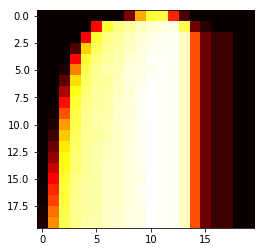

In [84]:
svc = svm.SVC(kernel="rbf",cache_size=4096)
clf = model_selection.GridSearchCV(estimator=svc, cv=model_selection.ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
                                   , param_grid=dict(C=C_range2, gamma=gamma_range2), n_jobs=-1,verbose=1)
SEARCHMAX=2000
clf.fit(X[:SEARCHMAX], y[:SEARCHMAX])
plt.imshow(clf.cv_results_["mean_test_score"].reshape(20,20), 
        cmap=cm.hot,norm=Normalize())
clf.best_params_

In [85]:
clf.best_params_

{'C': 4.0469987578846665, 'gamma': 0.009262390888788635}

事实证明SVM真的是大于$O^2$的

发现最优参数变了

再训练一次,然后提交看看

In [88]:
est = svm.SVC(C=4.0469987578846665, gamma=0.009262390888788635,cache_size=4096,verbose=True)
est.fit(X, y)
est.score(X_test, y_test)

[LibSVM]

0.9788095238095238

我们这次载入测试数据时要注意与训练数据进行同种预处理,不然预测的结果就不对了

In [89]:
test_file=DATAPATH+"test.csv"
test = pd.read_csv(test_file)

T=preprocessing.normalize(test.values)
T=pca.transform(T)

ans=est.predict(T)
ans

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [90]:
ids = np.reshape(np.arange(1, ans.shape[0] + 1), (-1, 1))
answer_column = np.reshape(ans, (-1, 1))
answer_matrix = np.append(ids, answer_column, axis=1)
df = pd.DataFrame(answer_matrix, columns=["ImageId", "Label"])
df.to_csv("pcasvm.csv", sep=",", index=False)

LB分数0.97914